In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

State before the oracle:
Statevector([ 1.+0.j, -0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,
             -0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j, -0.+0.j,
              0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
            dims=(2, 2, 2, 2, 2))

State after the oracle:
[ 1.-0.j -0.-0.j  0.-0.j -0.-0.j  0.-0.j -0.-0.j  0.-0.j -0.-0.j  0.-0.j
 -0.-0.j  0.-0.j -0.-0.j  0.-0.j -0.-0.j  0.-0.j -0.-0.j  0.-0.j  0.-0.j
  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j
  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j]


/tmp/ipykernel_60/468063785.py:37: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print(statevector.conj())


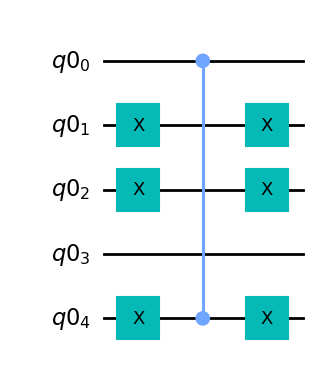

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute

def build_oracle(input_string):
    num_qubits = len(input_string)
    
    qr = QuantumRegister(num_qubits)
    qc = QuantumCircuit(qr)
    
    # Apply X gates to qubits corresponding to 1s in the input string
    for i, bit in enumerate(input_string):
        if bit == 1:
            qc.x(qr[i])
    
    # Apply the phase inversion to the state |01101>
    qc.cz(qr[0], qr[num_qubits-1])
    
    # Apply X gates again to qubits corresponding to 1s in the input string
    for i, bit in enumerate(input_string):
        if bit == 1:
            qc.x(qr[i])
    
    return qc

input_string = [0, 1, 1, 0, 1]
oracle_circuit = build_oracle(input_string)

simulator = Aer.get_backend('statevector_simulator')
job = execute(oracle_circuit, simulator)
result = job.result()
statevector = result.get_statevector()

# Print the state before and after applying the oracle
print("State before the oracle:")
print(statevector)

print("\nState after the oracle:")
print(statevector.conj())

# Draw the quantum circuit
oracle_circuit.draw()